### Exercise 1:  Pick one of the houses of representatives (113th, 114th, 115th), and build the network.

In [1]:
import pandas as pd
cong114 = pd.read_csv('../socialgraphs2018/files/data_US_congress/H114.csv', encoding='utf-8')

In [2]:
import io
import re
import networkx as nx

congress114graph_dir = nx.DiGraph()
congress114graph = nx.Graph()


path_folder = "../Representatives/114/"
for cm in cong114.WikiPageName.sort_values():
    
    #new node corresponding with new congressman
    congress114graph.add_node(cm,
                              state=cong114[cong114.WikiPageName == cm].State,
                              party=cong114[cong114.WikiPageName == cm].Party )
    
    f = io.open(path_folder+cm+'.txt', 'r', encoding='utf-8').read()
    links = re.findall("\[\[(.*?)\]\]", f)
    links_simple = list()
    wikilink_rx = re.compile(r'\[\[(?:[^|\]]*)\|?([^\]]+)\]\]')
    for l in links:
        match = re.search(r'([a-zA-Z0-9_\s\(\)\-\,.]*)\|([a-zA-Z0-9_\s\(\)\-\,.]*)', l)
        if match == None:
            m = l.replace(" ", "_")
            if m in set(cong114.WikiPageName):
                congress114graph.add_edge(cm, m)
        else:
            m1 = match.group(1).replace(" ", "_")
            m2 = match.group(2).replace(" ", "_")
            if m1 in set(cong114.WikiPageName):
                congress114graph.add_edge(cm, m1)
            if m2 in set(cong114.WikiPageName):
                congress114graph.add_edge(cm, m2)

### Exercise 2: Visualize the network of the house of representatives.

Try to visualize the network, using Networkx draw_spring.

In [3]:
nx.draw(congress114graph, node_size=7)

Do you think it looks nice?
- It really doesn't.

Visualize the network using the Networkx draw function, and node-coordinates from the force atlas algorithm. Plot nodes in different colors, according to their party. Also make the nodes' size proportional to their degree.
Play with the force atlas algorithm parameters to obtain a visualization you like. It may look similar to the one below (but not necessarily).
Describe the structure you observe. Can you identify nodes with a privileged position in the network? Do you observe chains of connected nodes?

100%|██████████| 4000/4000 [00:12<00:00, 328.08it/s]


BarnesHut Approximation  took  2.71  seconds
Repulsion forces  took  8.44  seconds
Gravitational forces  took  0.02  seconds
Attraction forces  took  0.06  seconds
AdjustSpeedAndApplyForces step  took  0.45  seconds


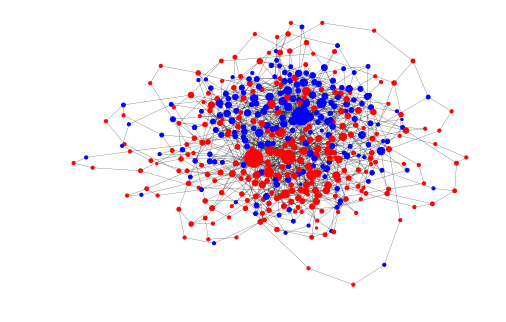

In [4]:
import fa2
import matplotlib.pyplot as plt

forceatlas2 = fa2.ForceAtlas2(
    # Behavior alternatives
    outboundAttractionDistribution=False,  # Dissuade hubs
    linLogMode=False,  # NOT IMPLEMENTED
    adjustSizes=False,  # Prevent overlap (NOT IMPLEMENTED)
    edgeWeightInfluence=0,

    # Performance
    jitterTolerance=.01,  # Tolerance
    barnesHutOptimize=True,
    barnesHutTheta=1.2,
    multiThreaded=False,  # NOT IMPLEMENTED

    # Tuning
    scalingRatio= 2000,
    strongGravityMode=True,
    gravity=10.0,
    # Log
    verbose=True)


positions = forceatlas2.forceatlas2_networkx_layout(congress114graph,
                                                    pos=None,
                                                    iterations=4000)

rep = list()
for node in congress114graph:
    if congress114graph.node[node]['party'].item() == 'Republican':
        rep.append(node)
        
node_colors = ["red" if n in rep
               else 'blue' for n in congress114graph.nodes()]

degrees = {}
for node, degree in nx.degree(congress114graph):
    degrees[node] = degree
    
nx.draw(congress114graph,
        positions,
        cmap=plt.get_cmap('jet'),
        #nodelist=degrees.keys(),
        node_size=[v * 5 for v in degrees.values()],
        node_color = node_colors,
        border = 0.1,
        border_color='black',
        overlap = False,
        width = 0.2,
        with_labels=False)
plt.show()

Describe the structure you observe.

Can you identify nodes with a privileged position in the network?
- With the current layout it is impossible to do so.
Do you observe chains of connected nodes?
- Not with this layout

Compare the network you have produced with the one below, showing the link structures between political blogs (see the full article here). How do they differ?

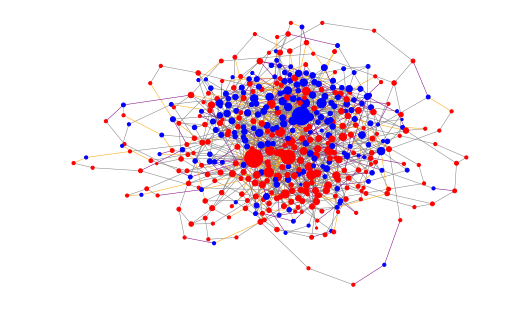

In [5]:
rep2dem = list() # conservative to liberal
dem2rep = list() # liberal to conservative

for edge in congress114graph.edges():
    if (congress114graph.node[edge[0]]['party'].item() == 'Republican') & (congress114graph.node[edge[1]]['party'].item() == 'Democratic'):
        rep2dem.append(edge)
    if (congress114graph.node[edge[1]]['party'].item() == 'Republican') & (congress114graph.node[edge[0]]['party'].item() == 'Democratic'):
        dem2rep.append(edge)

edge_colors = ["orange" if e in dem2rep
               else 'purple' if e in rep2dem
               else 'grey' for e in congress114graph.edges()]

nx.draw(congress114graph,
        positions,
        cmap=plt.get_cmap('jet'),
        #nodelist=degrees.keys(),
        node_size=[v * 5 for v in degrees.values()],
        node_color = node_colors,
        border = 0.1,
        border_color='black',
        edge_color = edge_colors,
        overlap = False,
        width = 0.5,
        with_labels=False)
plt.show()

Compare the network you have produced with the one below, showing the link structures between political blogs (see the full article here).
How do they differ?
 - From the first network the main difference is the lack of information regarding inter-blog relations. Besides I am still not able to make it look pretty.

### Exercise 3: Investigate the reasons for links between politicians to exist on Wikipedia.

Consider the node with highest out-degree in the network.Open the corresponding Wikipedia page.

In [6]:
path_folder = "../Representatives/114/"
for cm in cong114.WikiPageName.sort_values():
    
    #new node corresponding with new congressman
    congress114graph_dir.add_node(cm,
                              state=cong114[cong114.WikiPageName == cm].State,
                              party=cong114[cong114.WikiPageName == cm].Party )
    
    f = io.open(path_folder+cm+'.txt', 'r', encoding='utf-8').read()
    links = re.findall("\[\[(.*?)\]\]", f)
    links_simple = list()
    wikilink_rx = re.compile(r'\[\[(?:[^|\]]*)\|?([^\]]+)\]\]')
    for l in links:
        match = re.search(r'([a-zA-Z0-9_\s\(\)\-\,.]*)\|([a-zA-Z0-9_\s\(\)\-\,.]*)', l)
        if match == None:
            m = l.replace(" ", "_")
            if m in set(cong114.WikiPageName):
                congress114graph_dir.add_edge(cm, m)
        else:
            m1 = match.group(1).replace(" ", "_")
            m2 = match.group(2).replace(" ", "_")
            if m1 in set(cong114.WikiPageName):
                congress114graph_dir.add_edge(cm, m1)
            if m2 in set(cong114.WikiPageName):
                congress114graph_dir.add_edge(cm, m2)

In [7]:
mostConnected = max(congress114graph_dir.out_degree(), key=lambda x : x[1])
mostConnected[0]

'John_Boehner'

In [8]:
fileName = "../Representatives/114/" + mostConnected[0] + ".txt"
io.open(fileName, 'r').read()

'{"continue":{"rvcontinue":"20161218134519|755509710","continue":"||"},"warnings":{"main":{"*":"Subscribe to the mediawiki-api-announce mailing list at <https://lists.wikimedia.org/mailman/listinfo/mediawiki-api-announce> for notice of API deprecations and breaking changes. Use [[Special:ApiFeatureUsage]] to see usage of deprecated features by your application."},"revisions":{"*":"Because \\"rvslots\\" was not specified, a legacy format has been used for the output. This format is deprecated, and in the future the new format will always be used."}},"query":{"normalized":[{"from":"John_Boehner","to":"John Boehner"}],"pages":{"766900":{"pageid":766900,"ns":0,"title":"John Boehner","revisions":[{"timestamp":"2016-12-24T18:09:06Z","contentformat":"text/x-wiki","contentmodel":"wikitext","*":"{{redirect|Boehner|the Franciscan scholar|Philotheus Boehner}}\\n{{pp-move-indef}}\\n{{Use mdy dates|date=September 2015}}\\n{{pp-semi-blp|small=yes}}\\n{{Infobox officeholder\\n|name         = John Boe

Consider the set of neighbours of the node found above. Look for them in the page.

In [9]:
neighbors = congress114graph_dir.neighbors(mostConnected[0])
for n in neighbors:
    print(n)

Nancy_Pelosi
Paul_Ryan
Steny_Hoyer
Warren_Davidson
Kevin_McCarthy_(California_politician)
Jim_Costa
Jim_Cooper
Marcy_Kaptur
Justin_Amash
Daniel_Webster_(Florida_politician)
Louie_Gohmert
Ted_Yoho
Jeff_Duncan_(politician)
Trey_Gowdy
Peter_DeFazio


What is the relation between the politician you identified and his/her network neighbours? (e.g. they work together, they come from the same town, they are opponents...)
- nfi

Repeat the exercise for the second largest out-degree node. Write down possible reasons why links exist between Wikipedia pages of politicians. Do all the links carry the same meaning?
- probably not
Based on the observations above, can you partly explain the structure observed in Exercise 2?
- kinda i guess

In [10]:
secondMostConnected = sorted(congress114graph_dir.out_degree(), key=lambda x: x[1], reverse=True)[1]
secondMostConnected[0]

'Devin_Nunes'

# B) The structure of the house of representatives network

### Exercise 4: Begin to analyze the network of the house of representatives.

* Why do you think I want you guys to use a directed graph? Could have we used an undirected graph instead?
    
    It helps visualising the 'unbalanced' connections. By unbalanced I mean a connection that only goes from node A to B but not the other way around. This easily shows the most popular representatives, that will have the most inbound connections.
    We could have used an undirected graph but not we would not appreciate these aspects.
    
    
* What is the total number of nodes in the network? What is the total number of links? The density of the network?

In [11]:
nb_nodes = len(congress114graph_dir.nodes())
nb_links = len(congress114graph_dir.edges())
print("Total number of nodes in the 114th Congress Network: %s and %s is the number of links." % (nb_nodes, nb_links))

Total number of nodes in the 114th Congress Network: 442 and 1624 is the number of links.


* The density of the network?

In [12]:
potential_links = nb_nodes*(nb_nodes-1)/2
nw_density = nb_links/potential_links
nw_density

0.016663075486604898

* What are the average, median, mode, minimum and maximum value of the in-degree? And of the out-degree? How do you intepret the results?

In [13]:
import statistics
in_deg = list()
for n, d in congress114graph_dir.in_degree():
    in_deg.append(d)
in_deg_avg = statistics.mean(in_deg)
in_deg_median = statistics.median(in_deg)
in_deg_mode = statistics.mode(in_deg)
print('In-degree', in_deg)
print('Avergage In-degree', in_deg_avg)
print('In-degree Median', in_deg_median)
print('In-Degree Mode', in_deg_mode)

In-degree [8, 3, 59, 2, 6, 4, 5, 6, 1, 10, 1, 5, 4, 60, 3, 2, 4, 8, 3, 4, 3, 2, 2, 4, 3, 8, 3, 5, 6, 8, 4, 2, 4, 3, 3, 4, 1, 3, 3, 5, 6, 2, 4, 7, 3, 3, 2, 2, 2, 2, 3, 3, 3, 2, 2, 6, 0, 13, 16, 2, 6, 0, 4, 11, 36, 3, 1, 2, 3, 3, 3, 2, 2, 2, 1, 3, 4, 5, 9, 8, 2, 7, 3, 2, 3, 2, 2, 6, 4, 5, 5, 3, 2, 4, 2, 0, 11, 3, 7, 3, 8, 8, 4, 6, 4, 2, 7, 2, 4, 5, 3, 2, 2, 5, 2, 12, 2, 6, 2, 1, 5, 6, 5, 3, 6, 6, 3, 8, 7, 6, 3, 3, 5, 4, 2, 2, 3, 2, 4, 2, 2, 3, 0, 2, 2, 3, 2, 4, 4, 2, 4, 4, 6, 8, 0, 2, 3, 4, 2, 2, 3, 2, 5, 7, 5, 10, 3, 2, 2, 2, 3, 2, 2, 3, 1, 2, 2, 2, 3, 2, 1, 9, 4, 2, 3, 2, 2, 2, 3, 5, 6, 11, 6, 3, 5, 9, 6, 4, 4, 4, 2, 4, 5, 2, 4, 4, 8, 8, 4, 3, 4, 5, 2, 2, 7, 2, 5, 5, 6, 2, 6, 4, 5, 2, 3, 4, 3, 6, 4, 3, 2, 4, 8, 1, 4, 3, 4, 3, 5, 5, 5, 2, 2, 5, 4, 2, 3, 2, 2, 2, 2, 5, 4, 3, 2, 3, 5, 5, 2, 3, 5, 3, 2, 2, 2, 14, 4, 3, 1, 2, 2, 3, 2, 4, 2, 0, 2, 2, 2, 3, 7, 2, 2, 3, 3, 3, 2, 2, 3, 2, 2, 3, 5, 3, 0, 3, 3, 8, 5, 2, 2, 3, 2, 7, 4, 3, 5, 4, 6, 3, 4, 3, 3, 4, 1, 3, 2, 2, 4, 2, 4, 5, 4, 3, 4, 2,

In [14]:
out_deg = list()
for n, d in congress114graph_dir.out_degree():
    out_deg.append(d)
out_deg_avg = statistics.mean(out_deg)
out_deg_median = statistics.median(out_deg)
out_deg_mode = statistics.mode(out_deg)
print('Out-degree', out_deg)
print('Avergage Out-degree', out_deg_avg)
print('Out-degree Median', out_deg_median)
print('Out-Degree Mode', out_deg_mode)

Out-degree [7, 4, 15, 4, 14, 3, 6, 6, 5, 7, 1, 4, 11, 11, 4, 5, 4, 4, 2, 3, 5, 2, 2, 3, 2, 6, 4, 6, 3, 7, 3, 3, 3, 3, 3, 2, 1, 4, 3, 2, 4, 2, 3, 5, 4, 2, 2, 3, 2, 2, 3, 2, 2, 2, 1, 4, 5, 9, 6, 1, 5, 6, 2, 9, 5, 4, 2, 3, 1, 4, 3, 2, 2, 3, 2, 2, 5, 6, 7, 7, 2, 6, 4, 3, 3, 2, 2, 4, 4, 5, 5, 3, 2, 3, 4, 6, 8, 1, 5, 3, 9, 7, 4, 3, 5, 2, 4, 2, 4, 4, 3, 3, 2, 2, 2, 10, 2, 6, 0, 3, 4, 3, 12, 3, 5, 3, 3, 1, 5, 7, 2, 3, 4, 3, 1, 4, 2, 2, 5, 2, 1, 4, 3, 2, 1, 4, 5, 4, 4, 2, 4, 2, 11, 3, 2, 5, 4, 3, 5, 2, 1, 3, 5, 6, 4, 6, 2, 1, 2, 2, 1, 3, 2, 2, 2, 1, 2, 1, 3, 2, 3, 1, 3, 5, 3, 2, 2, 2, 2, 5, 5, 6, 4, 3, 4, 12, 4, 5, 5, 2, 2, 3, 6, 3, 4, 2, 6, 5, 3, 2, 5, 5, 4, 2, 5, 2, 5, 6, 7, 2, 3, 4, 5, 3, 8, 4, 2, 4, 3, 2, 5, 4, 6, 1, 2, 5, 2, 5, 4, 5, 4, 3, 2, 9, 4, 2, 2, 3, 3, 2, 2, 4, 9, 2, 2, 3, 5, 3, 6, 3, 4, 3, 3, 2, 1, 13, 2, 4, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 4, 5, 1, 3, 4, 3, 4, 2, 4, 2, 2, 4, 2, 8, 2, 4, 1, 3, 6, 4, 2, 5, 4, 3, 5, 4, 4, 8, 5, 7, 5, 5, 3, 2, 2, 2, 3, 3, 2, 5, 1, 5, 4, 3, 3, 4, 2, 3

This is the study degree of the uniderected graph based on the same network!

In [15]:
undir_deg = list()
for n, d in congress114graph.degree():
    undir_deg.append(d)
undir_deg_avg = statistics.mean(undir_deg)
undir_deg_median = statistics.median(undir_deg)
undir_deg_mode = statistics.mode(undir_deg)
print('Degree', undir_deg)
print('Average Degree', undir_deg_avg)
print('Degree Median', undir_deg_median)
print('Degree Mode', undir_deg_mode)

Degree [11, 4, 65, 4, 16, 5, 7, 6, 5, 10, 1, 6, 11, 64, 5, 5, 6, 8, 3, 4, 5, 2, 2, 4, 3, 11, 4, 6, 6, 8, 4, 3, 4, 3, 3, 4, 1, 4, 3, 6, 7, 2, 5, 9, 5, 3, 2, 3, 2, 2, 4, 3, 3, 2, 2, 6, 5, 17, 17, 2, 6, 6, 4, 14, 39, 5, 2, 3, 3, 4, 3, 2, 2, 3, 2, 3, 5, 6, 11, 11, 2, 9, 4, 3, 4, 2, 2, 6, 4, 6, 6, 3, 2, 5, 4, 6, 12, 3, 7, 4, 12, 11, 5, 7, 6, 2, 8, 2, 4, 5, 3, 3, 2, 5, 3, 16, 2, 8, 2, 3, 5, 7, 14, 4, 7, 6, 4, 8, 7, 11, 3, 3, 5, 4, 2, 4, 3, 2, 5, 2, 2, 4, 3, 3, 2, 5, 5, 4, 5, 2, 5, 4, 11, 8, 2, 5, 6, 4, 5, 2, 3, 3, 5, 8, 5, 12, 4, 2, 2, 2, 3, 3, 2, 3, 2, 2, 2, 2, 3, 2, 3, 10, 4, 5, 4, 2, 2, 2, 4, 6, 7, 12, 7, 3, 7, 15, 7, 7, 5, 4, 2, 4, 7, 3, 5, 4, 11, 8, 4, 4, 6, 6, 4, 2, 8, 2, 6, 6, 7, 2, 6, 5, 7, 4, 8, 5, 3, 6, 5, 3, 5, 4, 8, 1, 4, 6, 5, 6, 5, 5, 6, 3, 2, 10, 5, 2, 3, 3, 3, 3, 2, 6, 11, 3, 2, 4, 8, 5, 6, 3, 5, 3, 3, 2, 2, 18, 4, 4, 2, 2, 2, 3, 3, 4, 2, 1, 2, 2, 2, 4, 10, 2, 3, 4, 4, 4, 2, 4, 3, 2, 4, 3, 11, 3, 4, 3, 4, 10, 5, 2, 5, 4, 3, 8, 6, 4, 9, 5, 7, 5, 6, 3, 3, 4, 2, 3, 3, 2, 5, 2, 6

   These numbers show popularity is unevenly spread. Few nodes are the most popular with a big gap between them and the least popular.

* List the top 5 politicians by in-degree and out-degree. What is their party and state? Do these politicians play a particular role in the house?

In [16]:
top5_in = {}
top5_in_deg = sorted(congress114graph_dir.in_degree(), key=lambda x: x[1], reverse=True)[0:5]
top5_out_deg = sorted(congress114graph_dir.out_degree(), key=lambda x: x[1], reverse=True)[0:5]
for n in top5_in_deg:
    top5_in[n[0]] = congress114graph_dir.node[n[0]]
top5_out= {}
for n in top5_out_deg:
    top5_out[n] = congress114graph_dir.node[n[0]]

In [17]:
top5_in

{'Nancy_Pelosi': {'state': 16    California
  Name: State, dtype: object, 'party': 16    Democratic
  Name: Party, dtype: object}, 'John_Boehner': {'state': 27    Ohio
  Name: State, dtype: object, 'party': 27    Republican
  Name: Party, dtype: object}, 'Paul_Ryan': {'state': 92    Wisconsin
  Name: State, dtype: object, 'party': 92    Republican
  Name: Party, dtype: object}, 'Steny_Hoyer': {'state': 6    Maryland
  Name: State, dtype: object, 'party': 6    Democratic
  Name: Party, dtype: object}, 'Kevin_McCarthy_(California_politician)': {'state': 175    California
  Name: State, dtype: object,
  'party': 175    Republican
  Name: Party, dtype: object}}

In [18]:
top5_out

{('John_Boehner', 15): {'state': 27    Ohio
  Name: State, dtype: object, 'party': 27    Republican
  Name: Party, dtype: object}, ('Devin_Nunes', 14): {'state': 129    California
  Name: State, dtype: object, 'party': 129    Republican
  Name: Party, dtype: object}, ('Kevin_McCarthy_(California_politician)',
  13): {'state': 175    California
  Name: State, dtype: object, 'party': 175    Republican
  Name: Party, dtype: object}, ('Tom_Rooney_(Florida_politician)',
  13): {'state': 215    Florida
  Name: State, dtype: object, 'party': 215    Republican
  Name: Party, dtype: object}, ('Bill_Posey', 12): {'state': 213    Florida
  Name: State, dtype: object, 'party': 213    Republican
  Name: Party, dtype: object}}

* Plot the distribution of in-degrees and out-degrees, binned using numpy.histogram. What is the most common in-degree? The most common out-degree?

Text(0.5,1,'Out degree distribution')

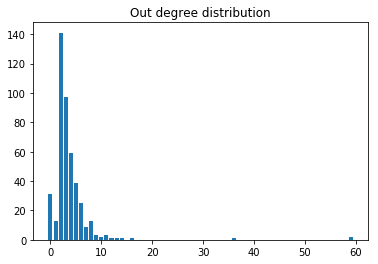

In [19]:
import numpy
import matplotlib
binned_in_deg = numpy.histogram(in_deg,bins=sorted(in_deg))
binned_out_deg = numpy.histogram(out_deg,bins=sorted(out_deg))
matplotlib.pyplot.bar(binned_in_deg[1][0:len(binned_in_deg[0])], binned_in_deg[0])
matplotlib.pyplot.title("Out degree distribution")

Text(0.5,1,'In degree distribution')

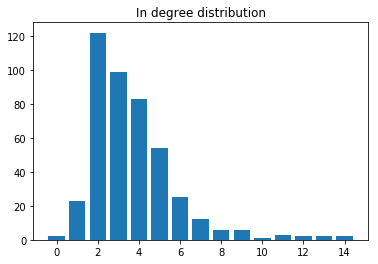

In [20]:
matplotlib.pyplot.bar(binned_out_deg[1][0:len(binned_out_deg[0])], binned_out_deg[0])
matplotlib.pyplot.title("In degree distribution")

In [21]:
print("Most common in-degree is %s" % statistics.mode(in_deg))
print("Most common out-degree is %s" % statistics.mode(out_deg))

Most common in-degree is 2
Most common out-degree is 2


* Plot the probability distribution of in-degrees and out-degrees one more time, this time plotted in loglog scale.

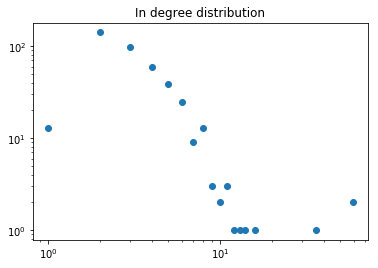

In [22]:
fig = plt.figure()
matplotlib.pyplot.title("In degree distribution")
matplotlib.pyplot.loglog()
matplotlib.pyplot.plot(binned_in_deg[1][0:len(binned_in_deg[0])], binned_in_deg[0], 'o')

[]

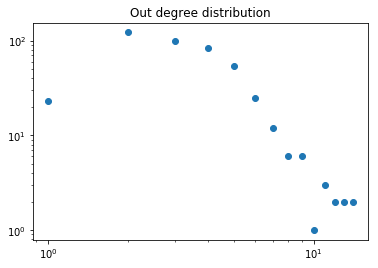

In [23]:
binned_cnx = numpy.histogram(ave_cnx_same_party,bins=sorted(ave_cnx_same_party.values()))
fig = plt.figure()
matplotlib.pyplot.plot(binned_out_deg[1][0:len(binned_out_deg[0])], binned_out_deg[0], 'o')
matplotlib.pyplot.title("Out degree distribution")
matplotlib.pyplot.loglog()

* Describe the distributions (as you would in a well written figure caption). Do they look Poissonian? Power-law? Something in between?
    
    By using the log-log axis we get a closer look at the values between the first and most populated decade (1-10). On the other hand, using the linear axis we find a graphic close to a Poissonian, being the first half steeper and the second one softer.


* Plot a scatter plot of the the in- versus out- degree for all politicians. Comment on the relation between the two.


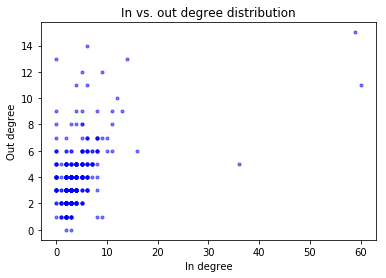

In [24]:
import numpy as np
x = in_deg
y = out_deg
colors = 'blue'
area = np.pi*3
 
# Plot
plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.title('In vs. out degree distribution')
plt.xlabel('In degree')
plt.ylabel('Out degree')
plt.show()

* Plot a heatmap (Hint here) of the the in- versus out- degree for all politicians. What is the advantage of using a heatmap?
    It clearly shows the distribution, whereas in the previous plot (scatter) you it's deductable but not explicit.

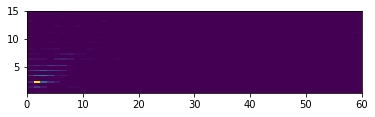

In [25]:
heatmap, xedges, yedges = np.histogram2d(in_deg, out_deg, bins=50)
extent = [xedges[0], xedges[-1], yedges[1], yedges[-1]]

plt.clf()
plt.imshow(heatmap.T, extent=extent, origin='lower')
plt.show()

### Exercise 5: Going in depth with the structure of house of representatives network.


* Find the 5 most central politicians according to betweenness centrality. What role do you imagine politicians with high wikipedia graph betweenness centrality play?
    They must have a leading position in their respectives parties/departments.

In [26]:
top5_bet = sorted(nx.betweenness_centrality(congress114graph_dir), key=lambda x: x[1], reverse=True)[0:5]
top5_bet

['Ryan_Costello',
 'Cynthia_Lummis',
 'Lynn_Jenkins',
 'Kyrsten_Sinema',
 'Ryan_Zinke']

* Find the 5 most central politicians according to eigenvector centrality. Calculate centrality corresponding to both in- and out-edges (see NetworkX documentation for details).


In [27]:
top5_eigen = sorted(nx.eigenvector_centrality(congress114graph_dir), key=lambda x: x[1], reverse=True)[0:5]
top5_eigen

['Ryan_Costello',
 'Cynthia_Lummis',
 'Lynn_Jenkins',
 'Kyrsten_Sinema',
 'Ryan_Zinke']

In [28]:
in_centrality = nx.in_degree_centrality(congress114graph_dir)
out_centrality = nx.out_degree_centrality(congress114graph_dir)
for node in top5_bet:
    print(node, 'i ctr.:', in_centrality[node], 'o ctr.:', out_centrality[node])

Ryan_Costello i ctr.: 0.0045351473922902496 o ctr.: 0.0045351473922902496
Cynthia_Lummis i ctr.: 0.015873015873015872 o ctr.: 0.011337868480725623
Lynn_Jenkins i ctr.: 0.009070294784580499 o ctr.: 0.011337868480725623
Kyrsten_Sinema i ctr.: 0.0045351473922902496 o ctr.: 0.011337868480725623
Ryan_Zinke i ctr.: 0.0045351473922902496 o ctr.: 0.006802721088435375


* Plot the betweenness centrality of nodes vs their degree centrality. Is there a correlation between the two? Did you expect that? Why?
    
    I expect some correlation due to the meaning of the measured parameters. Both refer to the node's connections. The degree centrality only considers connections with the neighbors while the betweenness contrality takes in account the paths using that node to get somewhere else.

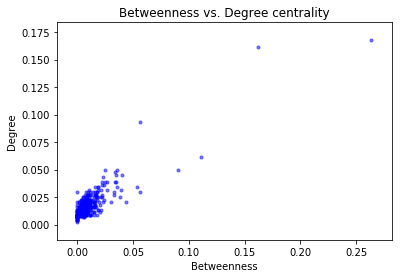

In [29]:
# Plot
plt.scatter(nx.betweenness_centrality(congress114graph_dir).values(),
            nx.degree_centrality(congress114graph_dir).values(),
            s=area, c=colors, alpha=0.5)
plt.title('Betweenness vs. Degree centrality')
plt.ylabel('Degree')
plt.xlabel('Betweenness')
plt.rcParams['figure.figsize']=[15,8]
plt.show()

* Repeat the two points above using eigenvector centrality instead. Do you observe any difference? Why?


In [30]:
in_centrality = nx.in_degree_centrality(congress114graph_dir)
out_centrality = nx.out_degree_centrality(congress114graph_dir)
for node in top5_eigen:
    print(node, 'i ctr.:', in_centrality[node], 'o ctr.:', out_centrality[node])

Ryan_Costello i ctr.: 0.0045351473922902496 o ctr.: 0.0045351473922902496
Cynthia_Lummis i ctr.: 0.015873015873015872 o ctr.: 0.011337868480725623
Lynn_Jenkins i ctr.: 0.009070294784580499 o ctr.: 0.011337868480725623
Kyrsten_Sinema i ctr.: 0.0045351473922902496 o ctr.: 0.011337868480725623
Ryan_Zinke i ctr.: 0.0045351473922902496 o ctr.: 0.006802721088435375


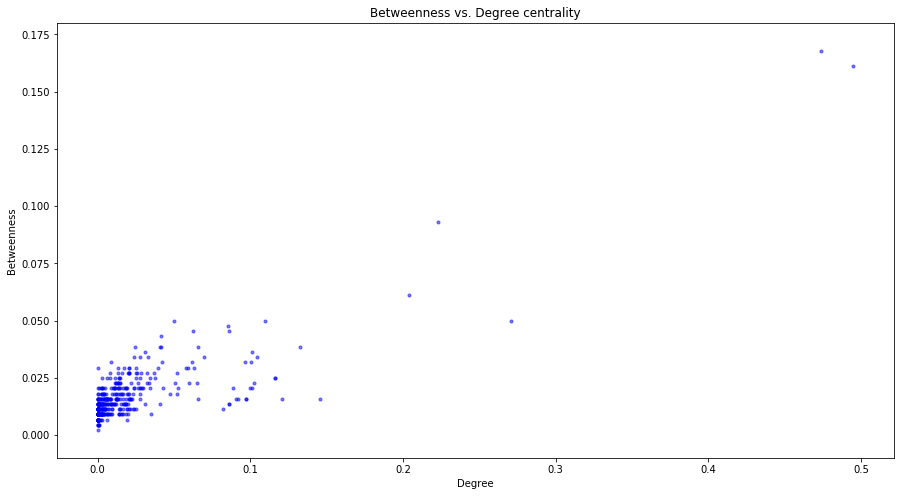

In [31]:
# Plot
plt.scatter(nx.eigenvector_centrality(congress114graph_dir).values(),
            nx.degree_centrality(congress114graph_dir).values(),
            s=area, c=colors, alpha=0.5)
plt.title('Betweenness vs. Degree centrality')
plt.xlabel('Degree')
plt.ylabel('Betweenness')
plt.show()

* Is the undirected version of the graph assortative with respect to degree? (e.g. do high-degree politicians tend to link to other high-degree politicians, and low-degree politicians to other low-degree politicians?). Provide an interpretation of your answer.

    The assortativity coefficient shows that it doesn't happen that often. This may be due to the hierarchy inside each of the parties, that forces representatives to connect with higher levels therefore with different-degree connections.

In [32]:
nx.degree_assortativity_coefficient(congress114graph)

0.0013880997641505107

* What is the average shortest path length? Is it similar to the one of a random graph with the same number of nodes and p?


In [33]:
nx.average_shortest_path_length(congress114graph)

3.7778085593211643

Parties and states of the members of the house plays a large role. Now, let us explore if and how they shape the network.


### Exercise 6: Parties and nodes centrality.
* Compute the average node centrality for Democratic and Republican members of the house (choose your favourite centrality measure).

In [34]:
rep = list()
for node in congress114graph:
    if congress114graph.node[node]['party'].item() == 'Republican':
        rep.append(node)

In [35]:
dem = list()
for node in congress114graph:
    if congress114graph.node[node]['party'].item() == 'Democratic':
        dem.append(node)

In [36]:
rep_graph = congress114graph_dir.subgraph(rep)
dem_graph = congress114graph_dir.subgraph(dem)

In [37]:
bet_cent_rep = list()

for i in nx.betweenness_centrality(rep_graph).values():
    bet_cent_rep.append(i)

In [38]:
print('Average betweenness centrality for Republicans is ', np.average(bet_cent_rep))

Average betweenness centrality for Republicans is  0.012120786694491873


In [39]:
bet_cent_dem = list()

for i in nx.betweenness_centrality(dem_graph).values():
    bet_cent_dem.append(i)
print('Average betweenness centrality for Democrats is ', np.average(bet_cent_dem))

Average betweenness centrality for Democrats is  0.013430295597148898


* Create a new graph, with the same nodes and edges, but where the association between nodes and parties is shuffled. Compute the average centrality of Republicans and Democrats nodes for this randomized graph.

In [40]:
rdm_cong14 = congress114graph_dir
for node in dem_graph:
    rdm_cong14.node[node]['party'] = 'Republican'

i = 0
for node in rep_graph:
    if (i < 190):
        rdm_cong14.node[node]['party'] = 'Democratic'
        i = i+1


In [41]:
rdm_rep = list()
for node in congress114graph:
    if congress114graph.node[node]['party'].item() == 'Republican':
        rdm_rep.append(node)

rdm_dem = list()
for node in congress114graph:
    if congress114graph.node[node]['party'].item() == 'Democratic':
        rdm_dem.append(node)

In [42]:
rep_rdm_graph = congress114graph_dir.subgraph(rep)
dem_rdm_graph = congress114graph_dir.subgraph(dem)

In [43]:
centralities = list()

for r in rep_rdm_graph:
    centralities.append(nx.betweenness_centrality(rep_rdm_graph)[r])

In [44]:
hist_cent = np.histogram(centralities, bins=sorted(centralities))

<BarContainer object of 251 artists>

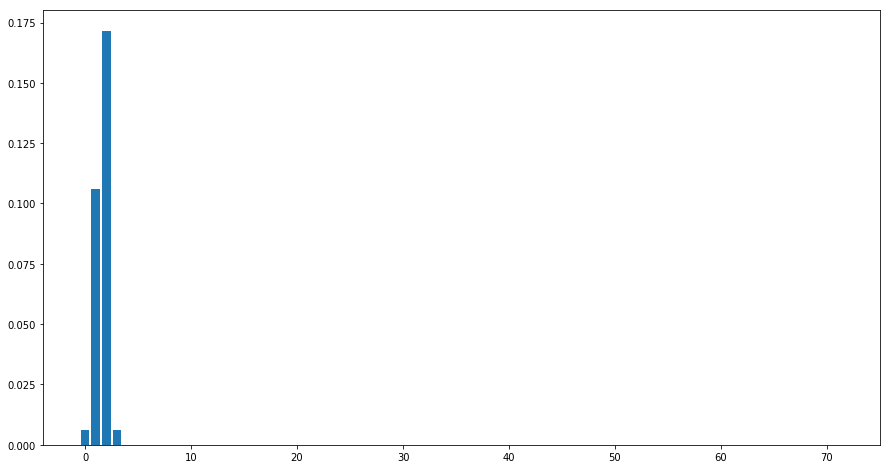

In [45]:
x = hist_cent[0]
y = hist_cent[1][0:len(x)]
plt.bar(x, y)

In [46]:
centralities_d = list()

for d in dem_rdm_graph:
    centralities_d.append(nx.betweenness_centrality(dem_rdm_graph)[d])

In [47]:
hist_cent_d = np.histogram(centralities_d, bins=sorted(centralities_d))

189
190


<BarContainer object of 189 artists>

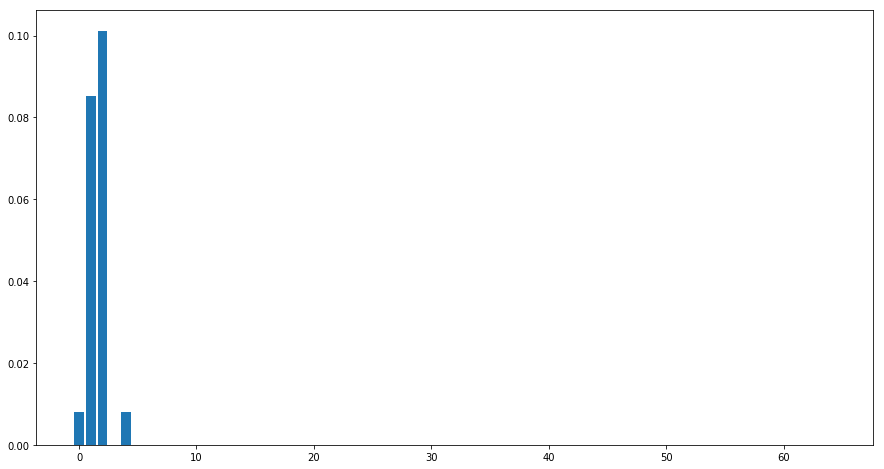

In [48]:
print(len(hist_cent_d[0]))
print(len(hist_cent_d[1]))
x = hist_cent_d[0]
y = hist_cent_d[1][0:len(x)]
plt.bar(x, y)

100%|██████████| 4000/4000 [00:11<00:00, 340.93it/s]


BarnesHut Approximation  took  2.73  seconds
Repulsion forces  took  8.02  seconds
Gravitational forces  took  0.02  seconds
Attraction forces  took  0.05  seconds
AdjustSpeedAndApplyForces step  took  0.43  seconds


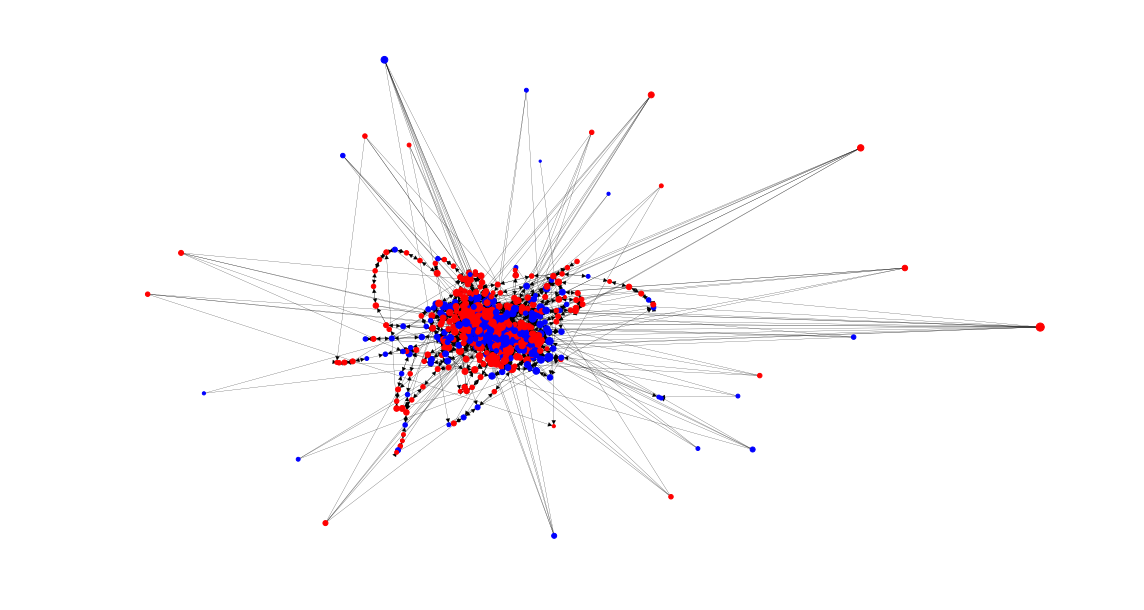

In [49]:
rdm_positions = forceatlas2.forceatlas2_networkx_layout(rdm_cong14,
                                                    pos=None,
                                                    iterations=4000)

node_colors = ["red" if n in rep
               else 'blue' for n in rdm_cong14.nodes()]

degrees = {}
for node, degree in nx.degree(rdm_cong14):
    degrees[node] = degree
    
nx.draw(rdm_cong14,
        rdm_positions,
        cmap=plt.get_cmap('jet'),
        #nodelist=degrees.keys(),
        node_size=[v * 5 for v in degrees.values()],
        node_color = node_colors,
        border = 0.1,
        border_color='black',
        overlap = False,
        width = 0.2,
        with_labels=False)

plt.show()

* Compare the value you have obtained in the real graph, with the randomized cases. Are members of one of the two parties more central in the network (on average)?

    kinda i guess
    
* Think about your results, what could be possible explanations for what you observe?


### Exercise 7: Assortativity with respect to parties and states.
* Consider the undirected version of the graph. For each node, compute the fraction of edges that connect to a node of his/her same party. Find the average value across all nodes.


In [98]:
ave_cnx_same_party = {}
for node in congress114graph_dir.nodes:
    cnx = 0
    p0 = ""
    if isinstance(congress114graph_dir.nodes[node]['party'], str):
        p0 = congress114graph_dir.nodes[node]['party']
    else:
        p0 = congress114graph_dir.nodes[node]['party'].item()
    for k,neighbor in congress114graph_dir.edges(node):
        if isinstance(congress114graph_dir.nodes[neighbor]['party'], str):
            p1 = congress114graph_dir.nodes[neighbor]['party']
        else:
            p1 = congress114graph_dir.nodes[neighbor]['party'].item()
        
        if p0 == p1:
            cnx = cnx + 1
    if len(congress114graph_dir.edges(node)) != 0:
        ave_cnx_same_party[node] = cnx / len(congress114graph_dir.edges(node))
    else:
        ave_cnx_same_party[node] = 0
        print(node, congress114graph_dir.edges(node))

Bill_Johnson_(Ohio_politician) []
Matt_Cartwright []


In [118]:
arr_ave_cnx = []
for i in ave_cnx_same_party.values():
    arr_ave_cnx.append(i)
arr_ave_mbr = []
for i in ave_cnx_same_party.keys():
    arr_ave_mbr.append(i)

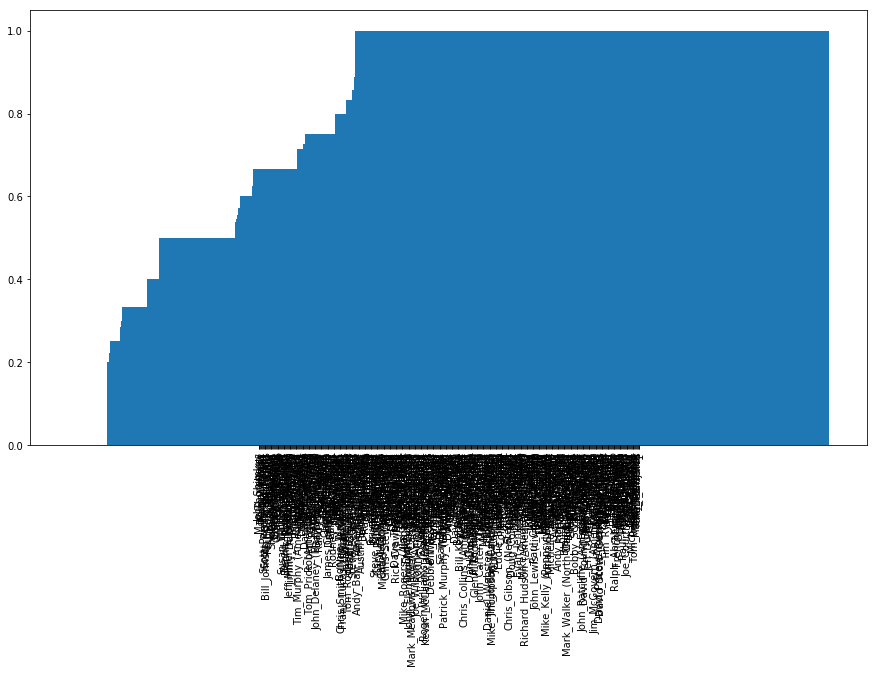

In [145]:
import operator
lists = sorted(ave_cnx_same_party.items(), key=operator.itemgetter(1))
x, y = zip(*lists) # unpack a list of pairs into two tuples
plt.bar(x, y, width='1')
plt.xticks(rotation='vertical')
plt.show()

* Create a new graph, with the same nodes and edges, but where the association between nodes and parties is shuffled. Compute the measure above for this randomized graph.
* Repeat the point above 100 times (at least). Plot the distribution of the values obtained and compare it with the value you have found for the real graph. Do you find that the chance to connect to a member of the same party is higher than it would be by random chance?
* Could you get to the same conclusion by measuring the assortativity coefficient with respect to the party?
* Repeat the exercise, but considering states instead of parties.
* How do you interpret these results in light of what you have observed in Exercise 3?